# Exercises
Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import pydataset

np.random.seed(4)

from env import get_db_url


url = get_db_url('iris_db')
df = pd.read_sql('''SELECT * FROM measurements
                    LEFT JOIN species USING (species_id)
                    ;''', url)

In [2]:
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


## 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.
Visualize the results of your clustering.
Use the elbow method to visually select a good value for k.
Repeat the clustering, this time with 3 different features.

In [3]:
x_df = df.drop(['species_name', 'species_id', 'measurement_id'], axis=1)
x_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# features to test
X = df[['sepal_width', 'petal_width']]


In [5]:
# creating the object
kmeans = KMeans(n_clusters=3)

# fitting the model
kmeans.fit(X)

# predicting
kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [6]:
# adding the nerw feature to dataframe
X['cluster'] = kmeans.predict(X)


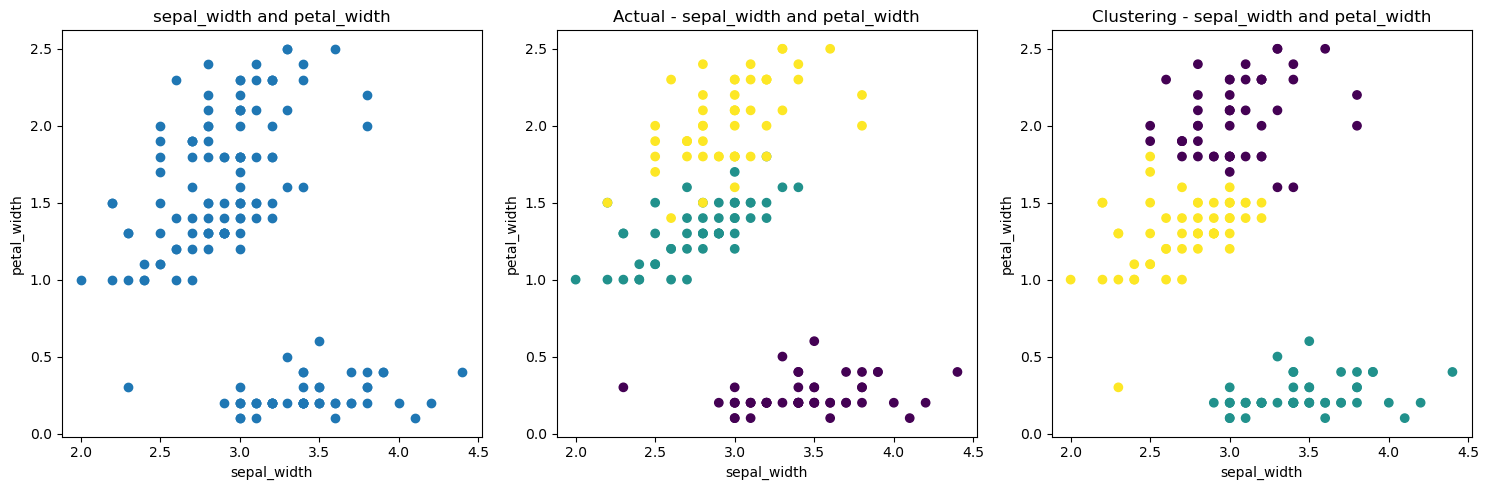

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))


ax1.scatter(X['sepal_width'], X['petal_width'])
ax1.set_title('sepal_width and petal_width')
ax1.set_xlabel('sepal_width')
ax1.set_ylabel('petal_width')

ax2.scatter(df['sepal_width'], df['petal_width'], c=df['species_id'])
ax2.set_title('Actual - sepal_width and petal_width')
ax2.set_xlabel('sepal_width')
ax2.set_ylabel('petal_width')

ax3.scatter(X['sepal_width'], X['petal_width'], c=X['cluster'])
ax3.set_title('Clustering - sepal_width and petal_width')
ax3.set_xlabel('sepal_width')
ax3.set_ylabel('petal_width')

# Adjust the layout and spacing between subplots
plt.tight_layout()


plt.show()


## Choosing the k number using the features sepal_width and petal_width

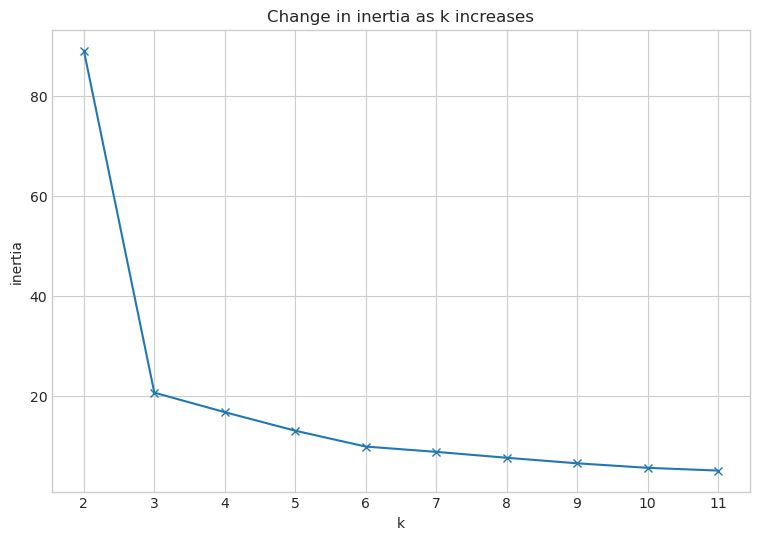

In [8]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## Conclusion:
As far as inertia, the best model to choose is the k=3 for sepal_width and petal_width.

In [9]:
X = df[['sepal_width', 'petal_width', 'petal_length']]
X.head()

,sepal_width,petal_width,petal_length
0,3.5,0.2,1.4
1,3.0,0.2,1.4
2,3.2,0.2,1.3
3,3.1,0.2,1.5
4,3.6,0.2,1.4


In [10]:
# creating the object
kmeans = KMeans(n_clusters=3)

# fitting the model
kmeans.fit(X)

# predicting
kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [11]:
# adding the nerw feature to dataframe
X['cluster'] = kmeans.predict(X)


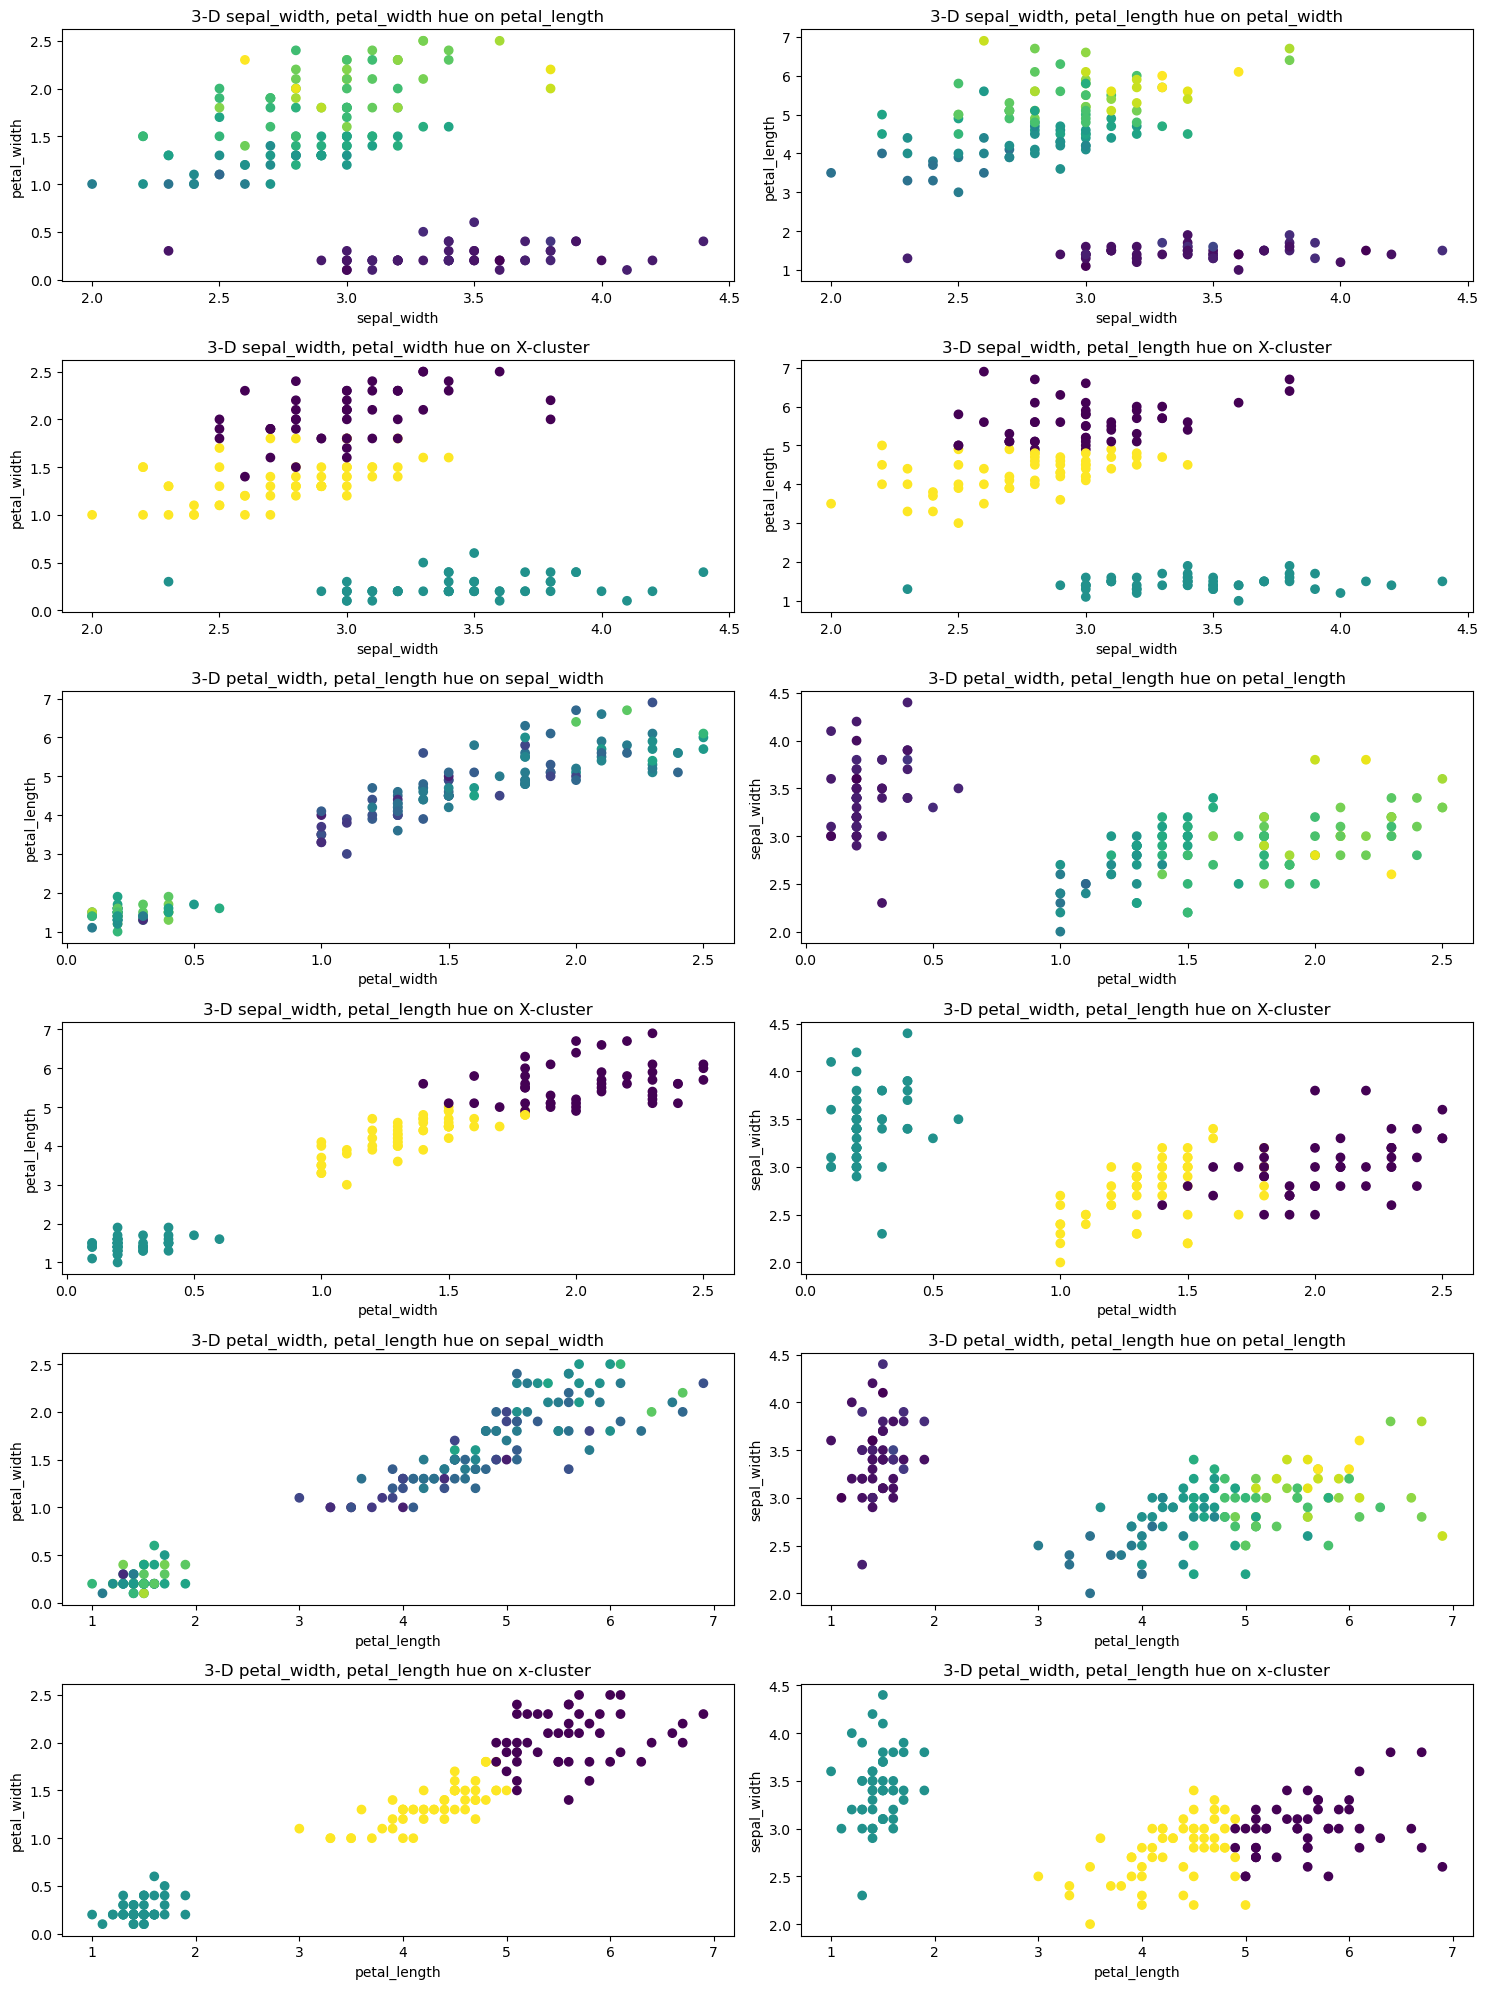

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2, figsize=(15, 20))


ax1.scatter(X['sepal_width'], X['petal_width'], c=X['petal_length'])
ax1.set_title('3-D sepal_width, petal_width hue on petal_length')
ax1.set_xlabel('sepal_width')
ax1.set_ylabel('petal_width')

ax2.scatter(df['sepal_width'], df['petal_length'], c=df['petal_width'])
ax2.set_title('3-D sepal_width, petal_length hue on petal_width')
ax2.set_xlabel('sepal_width')
ax2.set_ylabel('petal_length')

ax3.scatter(X['sepal_width'], X['petal_width'], c=X['cluster'])
ax3.set_title('3-D sepal_width, petal_width hue on X-cluster')
ax3.set_xlabel('sepal_width')
ax3.set_ylabel('petal_width')

ax4.scatter(X['sepal_width'], X['petal_length'], c=X['cluster'])
ax4.set_title('3-D sepal_width, petal_length hue on X-cluster')
ax4.set_xlabel('sepal_width')
ax4.set_ylabel('petal_length')

ax5.scatter(X['petal_width'], X['petal_length'], c=X['sepal_width'])
ax5.set_title('3-D petal_width, petal_length hue on sepal_width')
ax5.set_xlabel('petal_width')
ax5.set_ylabel('petal_length')

ax6.scatter(X['petal_width'], X['sepal_width'], c=X['petal_length'])
ax6.set_title('3-D petal_width, petal_length hue on petal_length')
ax6.set_xlabel('petal_width')
ax6.set_ylabel('sepal_width')

ax7.scatter(X['petal_width'], X['petal_length'], c=X['cluster'])
ax7.set_title('3-D sepal_width, petal_length hue on X-cluster')
ax7.set_xlabel('petal_width')
ax7.set_ylabel('petal_length')

ax8.scatter(X['petal_width'], X['sepal_width'], c=X['cluster'])
ax8.set_title('3-D petal_width, petal_length hue on X-cluster')
ax8.set_xlabel('petal_width')
ax8.set_ylabel('sepal_width')

ax9.scatter(X['petal_length'], X['petal_width'], c=X['sepal_width'])
ax9.set_title('3-D petal_width, petal_length hue on sepal_width')
ax9.set_xlabel('petal_length')
ax9.set_ylabel('petal_width')

ax10.scatter(X['petal_length'], X['sepal_width'], c=X['petal_width'])
ax10.set_title('3-D petal_width, petal_length hue on petal_length')
ax10.set_xlabel('petal_length')
ax10.set_ylabel('sepal_width')

ax11.scatter(X['petal_length'], X['petal_width'], c=X['cluster'])
ax11.set_title('3-D petal_width, petal_length hue on x-cluster')
ax11.set_xlabel('petal_length')
ax11.set_ylabel('petal_width')

ax12.scatter(X['petal_length'], X['sepal_width'], c=X['cluster'])
ax12.set_title('3-D petal_width, petal_length hue on x-cluster')
ax12.set_xlabel('petal_length')
ax12.set_ylabel('sepal_width')

# Adjust the layout and spacing between subplots
plt.tight_layout()


plt.show()

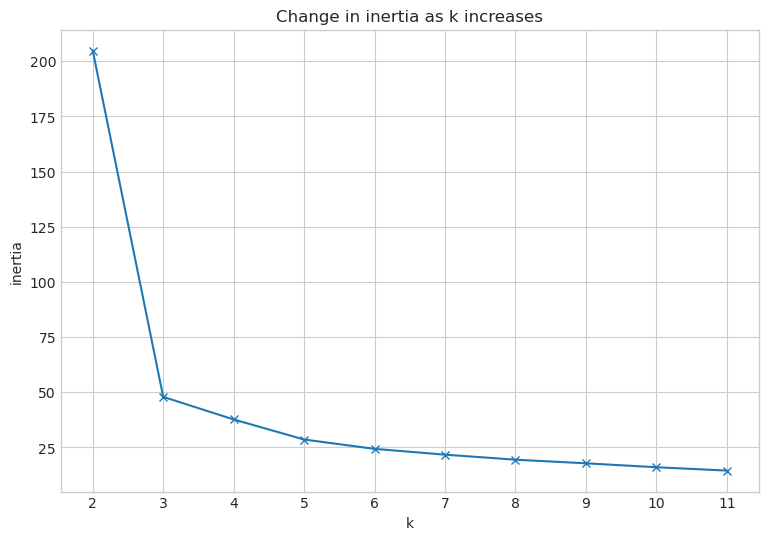

In [13]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [14]:
url = get_db_url('mall_customers')
df = pd.read_sql('''SELECT * 
                    FROM customers;
                    ''', url)

In [15]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
get_dummies_df = pd.get_dummies(df['gender'])

In [17]:
df = pd.concat([df, get_dummies_df], axis=1)
df.drop(['gender','Female'], axis=1, inplace=True)

In [18]:
df.rename(columns={'Male': 'is_male'}, inplace=True)

In [19]:
df.head()

,customer_id,age,annual_income,spending_score,is_male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [20]:
# features to test
X = df[['annual_income', 'age']]


In [21]:
# creating the object
kmeans = KMeans(n_clusters=3)

# fitting the model
kmeans.fit(X)

# predicting
kmeans.predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [22]:
# adding the nerw feature to dataframe
X['cluster'] = kmeans.predict(X)


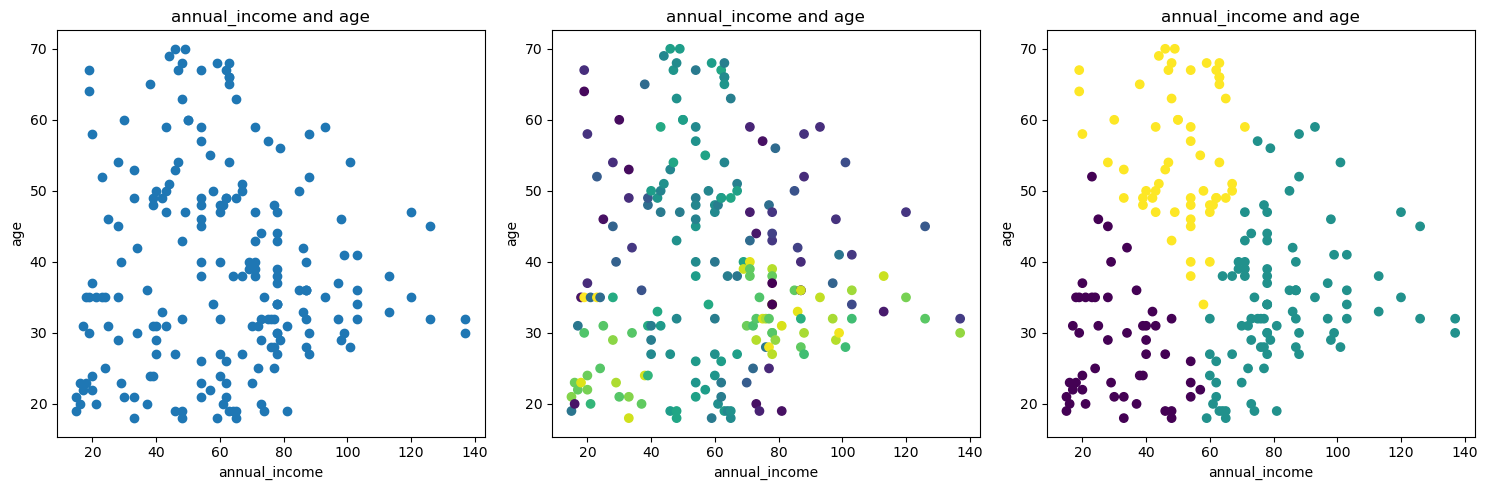

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))


ax1.scatter(X['annual_income'], X['age'])
ax1.set_title('annual_income and age')
ax1.set_xlabel('annual_income')
ax1.set_ylabel('age')

ax2.scatter(df['annual_income'], df['age'], c=df['spending_score'])
ax2.set_title('annual_income and age')
ax2.set_xlabel('annual_income')
ax2.set_ylabel('age')

ax3.scatter(X['annual_income'], X['age'], c=X['cluster'])
ax3.set_title('annual_income and age')
ax3.set_xlabel('annual_income')
ax3.set_ylabel('age')

# Adjust the layout and spacing between subplots
plt.tight_layout()


plt.show()


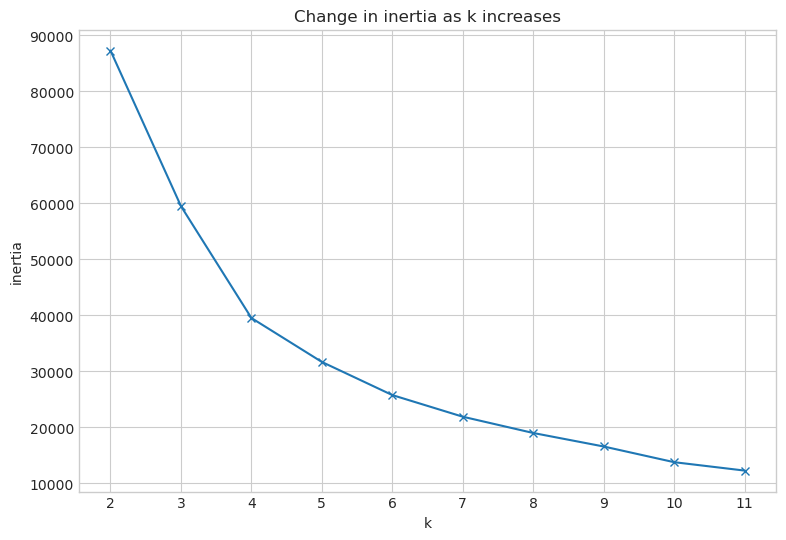

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [25]:
# features to test
X = df[['annual_income', 'age']]

In [26]:
# creating the object
kmeans = KMeans(n_clusters=5)

# fitting the model
kmeans.fit(X)

# predicting
kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [27]:
# adding the nerw feature to dataframe
X['cluster'] = kmeans.predict(X)


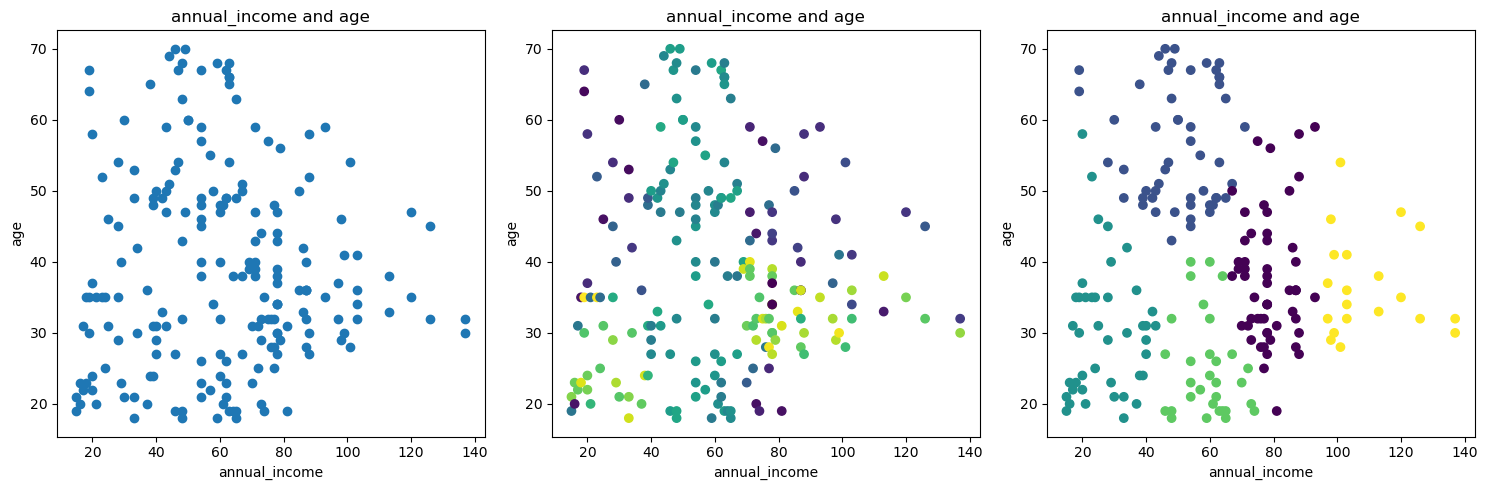

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))


ax1.scatter(X['annual_income'], X['age'])
ax1.set_title('annual_income and age')
ax1.set_xlabel('annual_income')
ax1.set_ylabel('age')

ax2.scatter(df['annual_income'], df['age'], c=df['spending_score'])
ax2.set_title('annual_income and age')
ax2.set_xlabel('annual_income')
ax2.set_ylabel('age')

ax3.scatter(X['annual_income'], X['age'], c=X['cluster'])
ax3.set_title('annual_income and age')
ax3.set_xlabel('annual_income')
ax3.set_ylabel('age')

# Adjust the layout and spacing between subplots
plt.tight_layout()


plt.show()

## 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.